In [17]:
# Import Dependencies
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
import openweathermapy.core as owm
from pprint import pprint
import numpy as np

# Import API key
from config import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# displays everything as float instead of sci notation
#pd.options.display.float_format = '{:.1f}'.format

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#generating a list of cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



647

In [3]:
index = []
columns = []
df = pd.DataFrame(index=index, columns=columns)
df['City']=cities
df = df.drop_duplicates(subset=['City'])
len(df)



647

In [4]:
#adding lat and lng for each of the 500 cities
list_lat = []
list_lng = []

url = "https://maps.googleapis.com/maps/api/geocode/json?address="

for index, row in df.iterrows():
    query_url = url + row['City'] + "&key=" + api_key
    result = requests.get(query_url).json()
    try:
        list_lat.append(result['results'][0]['geometry']['location']['lat'])
    except IndexError:
        list_lat.append(None)
    try:
        list_lng.append(result['results'][0]['geometry']['location']['lng'])
    except IndexError:
        list_lng.append(None)

df['Lat'] = list_lat
df['Lng'] = list_lng

len(df)

647

In [6]:
# Create settings dictionary with information we're interested in
from config2 import api_key
settings = {"units": "imperial", "appid": api_key}


In [9]:
temp = []
humid = []
cloud = []
wind = []


for index, row in df.iterrows():
    try:
        current_weather = owm.get_current(row['City'], **settings)
    except:
        pass
    try:
        temp.append(current_weather['main']['temp'])
    except IndexError:
        temp.append(None)
    try:
        humid.append(current_weather['main']['humidity'])
    except IndexError:
        humid.append(None)
    try:
        cloud.append(current_weather['clouds']['all'])
    except IndexError:
        cloud.append(None)
    try:
        wind.append(current_weather['wind']['speed'])
    except IndexError:
        wind.append(None)




In [10]:
df['Temp'] = temp
df['Humidity'] = humid
df['Cloudiness'] = cloud
df['Wind Speed'] = wind
df.head()

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed
0,nikolskoye,55.198160,166.001537,66.20,82,0,2.24
1,kodiak,57.790000,-152.407222,82.40,54,1,3.36
2,sorland,67.663573,12.692674,58.92,100,44,8.19
3,ushuaia,-54.801912,-68.302951,42.80,56,75,5.82
4,camacha,32.679852,-16.850288,70.57,68,75,10.29


In [29]:
df = df.dropna()
df = df.sample(n=500)
df = df.reset_index(drop=True)
df.head()

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed
0,maceio,-9.649849,-35.708949,66.20,93,0,1.12
1,yerbogachen,61.277659,108.013667,69.90,58,44,6.96
2,changji,44.013183,87.304112,88.08,78,64,4.16
3,rio gallegos,-51.623049,-69.216829,46.40,39,0,23.04
4,alingsas,57.930020,12.536211,58.05,87,0,3.36


In [15]:
# Push the  DataFrame to a new CSV file
df.to_csv("500citiesdata.csv", encoding="utf-8", index=False, header=True)


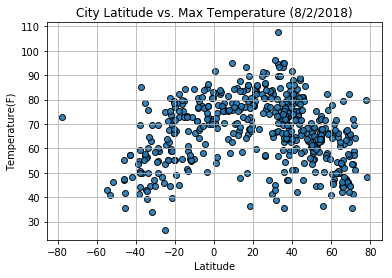

In [30]:
#Scatter Plot: Temp vs. Lat
plt.scatter(df.Lat, df.Temp, edgecolor='black', alpha=0.9)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (8/2/2018)')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.grid()


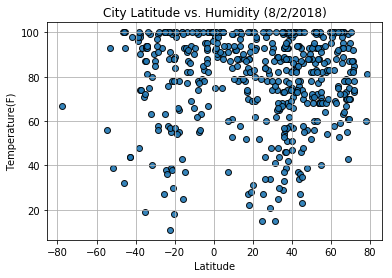

In [28]:
#Scatter Plot: Humidity vs. Lat

plt.scatter(df.Lat, df.Humidity, edgecolor='black', alpha=0.9)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (8/2/2018)')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.grid()

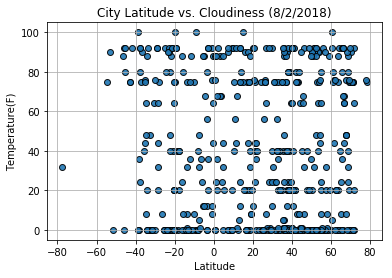

In [31]:
#Scatter Plot: Cloudiness vs. Lat

plt.scatter(df.Lat, df.Cloudiness, edgecolor='black', alpha=0.9)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (8/2/2018)')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.grid()

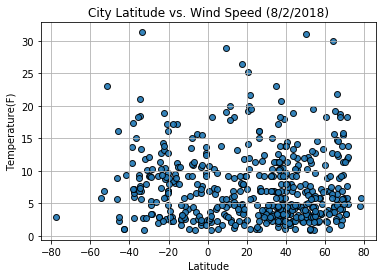

In [33]:
#Scatter Plot: Wind Speed vs. Lat
x = df['Lat']
y = df['Wind Speed']
plt.scatter(x, y, edgecolor='black', alpha=0.9)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (8/2/2018)')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.grid()